<a href="https://colab.research.google.com/github/ShoaibFarooqui/Emotion-Classification/blob/Shoaib/emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Classification
40 sample demonstration identifying Emotional States using a Recurrent Neural Network

In [25]:
import zipfile
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [26]:
# compressed file extraction after zip import
zip_path = '/content/data.zip'
extract_path = '/content/extracted_files/'
with zipfile.ZipFile(zip_path, 'r') as zip:
  zip.extractall(extract_path)

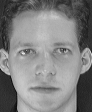

In [27]:
# sample image display
face_sample = Image.open('/content/extracted_files/data/s1/1.pgm')
display(face_sample)

In [28]:
# def function that opens a given sample (s# folder)
def sample_col(sample_directory):
  pgm_images = []
  for pgm_image in os.scandir(sample_directory):
    if pgm_image.name.endswith('.pgm'):
      pgm_images.append(pgm_image.path)
  
  # for image_file in pgm_images:
  #   Image.open(image_file).show()
  
  return pgm_images

In [29]:
# demo sample_col() function
sample_col('/content/extracted_files/data/s6')  

['/content/extracted_files/data/s6/7.pgm',
 '/content/extracted_files/data/s6/8.pgm',
 '/content/extracted_files/data/s6/9.pgm',
 '/content/extracted_files/data/s6/6.pgm',
 '/content/extracted_files/data/s6/5.pgm',
 '/content/extracted_files/data/s6/3.pgm',
 '/content/extracted_files/data/s6/10.pgm',
 '/content/extracted_files/data/s6/1.pgm',
 '/content/extracted_files/data/s6/2.pgm',
 '/content/extracted_files/data/s6/4.pgm']

In [30]:
# collect all images
all_images = {}

s_folder = np.arange(1,41,1)
for i in s_folder:
  s_folder_path = f'/content/extracted_files/data/s{i}'
  sample_image_list = sample_col(s_folder_path)
  all_images[f"s{i}"] = sample_image_list
all_images

{'s1': ['/content/extracted_files/data/s1/7.pgm',
  '/content/extracted_files/data/s1/8.pgm',
  '/content/extracted_files/data/s1/9.pgm',
  '/content/extracted_files/data/s1/6.pgm',
  '/content/extracted_files/data/s1/5.pgm',
  '/content/extracted_files/data/s1/3.pgm',
  '/content/extracted_files/data/s1/10.pgm',
  '/content/extracted_files/data/s1/1.pgm',
  '/content/extracted_files/data/s1/2.pgm',
  '/content/extracted_files/data/s1/4.pgm'],
 's2': ['/content/extracted_files/data/s2/7.pgm',
  '/content/extracted_files/data/s2/8.pgm',
  '/content/extracted_files/data/s2/9.pgm',
  '/content/extracted_files/data/s2/6.pgm',
  '/content/extracted_files/data/s2/5.pgm',
  '/content/extracted_files/data/s2/3.pgm',
  '/content/extracted_files/data/s2/10.pgm',
  '/content/extracted_files/data/s2/1.pgm',
  '/content/extracted_files/data/s2/2.pgm',
  '/content/extracted_files/data/s2/4.pgm'],
 's3': ['/content/extracted_files/data/s3/7.pgm',
  '/content/extracted_files/data/s3/8.pgm',
  '/conten